In [1]:
import librosa
import librosa.display
import numpy as np

In [2]:
import pandas as pd
import os

In [6]:
# Example of a spoken '0' spectrogram
y, sr = librosa.load(r'C:\Users\320026907\OneDrive-Philips\Documents\Practice\Audio\Digit_recognizer\My_code\Dataset\data0\0_jackson_0.wav', duration=0.41)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape
#sr sample rate is how many smples recorded in one minute = 22050

(128, 18)

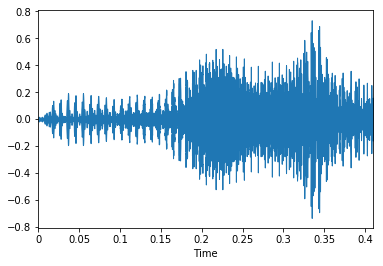

In [7]:
#librosa.display.specshow(ps, y_axis='mel', x_axis='time').show()
#https://librosa.github.io/librosa/generated/librosa.display.waveplot.html
librosa.display.waveplot(y=y, sr=sr)

In [19]:
# Example of a spoken '1' spectrogram
y, sr = librosa.load(r'C:\Users\320026907\OneDrive-Philips\Documents\Practice\Audio\Digit_recognizer\My_code\Dataset\data1\1_jackson_0.wav', duration=0.40)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 18)

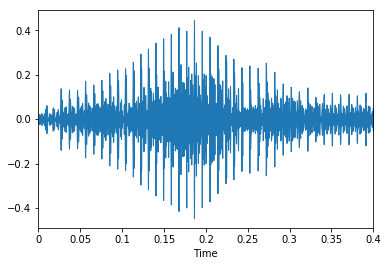

In [20]:
librosa.display.waveplot(y=y, sr=sr)

In [62]:
# Example of a spoken '2' spectrogram
y, sr = librosa.load(r'C:\Users\320026907\OneDrive-Philips\Documents\Practice\Audio\Digit_recognizer\My_code\Dataset\data2\2_jackson_0.wav', duration=0.41)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 18)

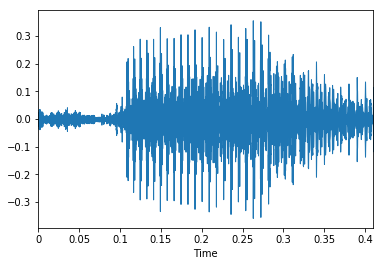

In [63]:
librosa.display.waveplot(y=y, sr=sr)

In [23]:
#duration of audio file
librosa.core.get_duration(y=y, sr=sr)

0.4

In [ ]:
import os
import pandas as pd

In [30]:
'''for root,subdir,files in os.walk(data_path):
    for file in files:
        y, sr = librosa.load(os.path.join(root,file), duration=0.4)  
        ps = librosa.feature.melspectrogram(y=y, sr=sr)
        if ps.shape != (128, 18): continue
        class_ID = file[0]
        Dataset.append((ps, class_ID))'''
    

In [31]:
#print("Number of samples: ", len(Dataset))

Number of samples:  812


In [34]:
#To check the duration of each wav file.

file_path = []
#ps_features = []
ps_shape = []
duration = []
class_id = []
Dataset = []

data_path= r'.\Dataset'

for root,subdir,files in os.walk(data_path):
    for file in files:
        #Extract features of audio as an array
        y, sr = librosa.load(os.path.join(root,file))  
        ps = librosa.feature.melspectrogram(y=y, sr=sr)
        
        #compute duration of each file
        dur = librosa.core.get_duration(y=y, sr=sr)
        duration.append(dur)
        
        #save the file path
        file_path.append(os.path.join(root,file))
        
        #save the class of the file
        class_id.append(int(file[0]))
        
        #save the shape of array
        ps_shape.append(ps.shape)
        
        #Save the data as Features(ps) and Labels(class_id)
        Dataset.append((ps,class_id))


In [35]:
Data_dict = {"Path":file_path,"Class":class_id,"Duration":duration,"ShapeOfFeatures":ps_shape, "Dataset":Dataset}

Data_inf = pd.DataFrame(Data_dict)

In [36]:
Data_inf.head()

,Path,Class,Duration,ShapeOfFeatures,Dataset
0,.\Dataset\data0\0_jackson_0.wav,0,0.643537,"(128, 28)","([[0.00020323036889559852, 9.208915105186953e-..."
1,.\Dataset\data0\0_jackson_1.wav,0,0.532653,"(128, 23)","([[0.0016066709707508865, 0.000450928548432657..."
2,.\Dataset\data0\0_jackson_10.wav,0,0.681406,"(128, 30)","([[0.002767579396130175, 0.0008033611608133638..."
3,.\Dataset\data0\0_jackson_11.wav,0,0.614286,"(128, 27)","([[0.0005671403527729196, 0.000251441216042339..."
4,.\Dataset\data0\0_jackson_12.wav,0,0.510884,"(128, 23)","([[0.00010693126472707527, 0.00050860210858477..."


In [42]:
#save the Data in CSV for future use
Data_inf.iloc[:,0:4].to_csv("DataSet_light.csv")

In [38]:
Data_inf.describe()

,Class,Duration
count,1500.000000,1500.000000
mean,4.500000,0.418192
std,2.873239,0.143167
min,0.000000,0.143628
25%,2.000000,0.327959
50%,4.500000,0.405964
75%,7.000000,0.481633
max,9.000000,2.282766


In [56]:
Data_inf[Data_inf.iloc[:,2]>=0.41].count()

Path               730
Class              730
Duration           730
ShapeOfFeatures    730
Dataset            730
dtype: int64

In [10]:
Dataset1 = []
data_path = r'C:\Users\320026907\OneDrive-Philips\Documents\Practice\Audio\Digit_recognizer\My_code\Dataset'
for root,subdir,files in os.walk(data_path):
    for file in files:
        y, sr = librosa.load(os.path.join(root,file), duration=0.41)  
        ps = librosa.feature.melspectrogram(y=y, sr=sr)
        if ps.shape != (128, 18): continue
        class_ID = int(file[0])
        Dataset1.append((ps, class_ID))

In [11]:
print("Number of samples: ", len(Dataset1))

Number of samples:  812


In [12]:
classes = [x[1] for x in Dataset1]
for i in range(10):
    cnt = classes.count(i)
    print("No of ",i," = ",cnt)

No of  0  =  125
No of  1  =  63
No of  2  =  63
No of  3  =  60
No of  4  =  57
No of  5  =  70
No of  6  =  93
No of  7  =  86
No of  8  =  67
No of  9  =  128


In [3]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import random

Using TensorFlow backend.


In [14]:
dataset = Dataset1
random.shuffle(dataset)

train = dataset[:650]
test = dataset[650:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

In [15]:
# Reshape for CNN input
X_train = np.array([x.reshape( (128, 18, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 18, 1) ) for x in X_test])

In [22]:
y_train = np.asarray(y_train).reshape((650,1))
y_test = np.asarray(y_test).reshape((162,1))

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test = np.array(keras.utils.to_categorical(y_test, 10))

In [25]:
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(650, 128, 18, 1)
(162, 128, 18, 1)
(650, 10)
(162, 10)


In [26]:
model = Sequential()
input_shape=(128, 18, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

'''model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))
'''
model.add(Flatten())
#model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [27]:
import tensorflow as tf
print(tf.__version__)

1.11.0


In [28]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

In [29]:
model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

Train on 650 samples, validate on 162 samples
Epoch 1/12
650/650 [==============================] - 2s 3ms/step - loss: 6.1660 - acc: 0.3615 - val_loss: 4.9016 - val_acc: 0.5370
Epoch 2/12
650/650 [==============================] - 1s 2ms/step - loss: 4.0165 - acc: 0.5723 - val_loss: 2.6972 - val_acc: 0.6914
Epoch 3/12
650/650 [==============================] - 1s 2ms/step - loss: 3.1054 - acc: 0.6292 - val_loss: 2.5611 - val_acc: 0.6790
Epoch 4/12
650/650 [==============================] - 1s 2ms/step - loss: 2.7546 - acc: 0.7015 - val_loss: 2.6313 - val_acc: 0.6975
Epoch 5/12
650/650 [==============================] - 1s 2ms/step - loss: 2.7128 - acc: 0.7046 - val_loss: 2.5597 - val_acc: 0.6728
Epoch 6/12
650/650 [==============================] - 1s 2ms/step - loss: 2.6373 - acc: 0.6892 - val_loss: 3.1536 - val_acc: 0.5741
Epoch 7/12
650/650 [==============================] - 1s 2ms/step - loss: 3.5840 - acc: 0.5554 - val_loss: 3.6386 - val_acc: 0.5309
Epoch 8/12
650/650 [==========

In [30]:
score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

162/162 [==============================] - 0s 920us/step
Test loss: 2.0112999353879766
Test accuracy: 0.7469135802469136
